In [1]:
from data import DATA_MC3D, DATA_MP

PRODUCTION DATA PRESENT


In [2]:
%run ./modules.ipynb

/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
mp_frames = ase.io.read(DATA_MP.structures, index=":")
exp_frames = ase.io.read(DATA_MC3D.structures, index=":")

In [5]:
len(mp_frames), len(exp_frames)

(83989, 79854)

In [6]:
natoms_mp = np.zeros(len(mp_frames), dtype=int)
natoms_exp = np.zeros(len(exp_frames), dtype=int)

for i, frame in enumerate(tqdm(mp_frames)):
    frame.wrap(eps=1e-10)
    natoms_mp[i] = len(frame)

for i, frame in enumerate(tqdm(exp_frames)):
    frame.wrap(eps=1e-10)
    natoms_exp[i] = len(frame)

100%|██████████| 79854/79854 [02:02<00:00, 653.57it/s] 


In [7]:
import PIL
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mat_project_logo = PIL.Image.open("mp_logo.png")
m3dcd_logo = PIL.Image.open("mc3d_logo.png")

In [8]:
n_magic_mp = len(np.where(natoms_mp % 4 == 0)[0])
n_nonmagic_mp = len(np.where(natoms_mp % 4 != 0)[0])

n_magic_3dcd = len(np.where(natoms_exp % 4 == 0)[0])
n_nonmagic_3dcd = len(np.where(natoms_exp % 4 != 0)[0])

## RoF wrt to other multiples 

In [9]:
n_multiple=2

n_magic_mp = len(np.where(natoms_mp % n_multiple == 0)[0])
# n_nonmagic_mp = len(np.where(natoms_mp % n_multiple != 0)[0])

n_magic_3dcd = len(np.where(natoms_exp % n_multiple == 0)[0])
# n_nonmagic_3dcd = len(np.where(natoms_exp % n_multn-Multiple -niple != 0)[0])

print("magic-count-3d", n_magic_3dcd, "magic-count-mp", n_magic_mp)
print("FOR MULTIPLES OF", n_multiple, "the percentage of magic in mc3d:", n_magic_3dcd*100/len(natoms_exp))
print("FOR MULTIPLES OF", n_multiple, "the percentage of magic in mp", n_magic_mp*100/len(natoms_mp))

magic-count-3d 68540 magic-count-mp 72090
FOR MULTIPLES OF 2 the percentage of magic in mc3d: 85.83164274801513
FOR MULTIPLES OF 2 the percentage of magic in mp 85.83266856374048


In [11]:
df_mp = pd.read_csv(DATA_MP.data)
df_mp['natoms']=natoms_mp
npzfile = np.load(DATA_MP.soap, allow_pickle=True)
for k in npzfile.files:
    print(k)
df_mp["magic"] = npzfile["magic"]
df_mp.head()

idx
my_frames
magic
X_raw
coeff


,mpid,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,natoms,magic
0,mp-85,In,0.003319,0.0000,2.700000e-05,1.044699,33.154748,4.904836,Full Formula (In1)\nReduced Formula: In\nabc ...,0.003319,Full Formula (In1)\nReduced Formula: In\nabc ...,1,0.0
1,mp-110,Mg,0.039182,0.0000,-1.360000e-05,-11.326659,35.636106,1.830272,Full Formula (Mg1)\nReduced Formula: Mg\nabc ...,0.039182,Full Formula (Mg1)\nReduced Formula: Mg\nabc ...,1,0.0
2,mp-20,Be,0.108143,0.0000,1.000000e-07,8.030000,124.000000,84.000000,Full Formula (Be4)\nReduced Formula: Be\nabc ...,0.108143,Full Formula (Be4)\nReduced Formula: Be\nabc ...,4,1.0
3,mp-8640,Hf,0.071216,0.0000,-2.050000e-05,0.881277,101.242732,44.836516,Full Formula (Hf1)\nReduced Formula: Hf\nabc ...,0.071216,Full Formula (Hf1)\nReduced Formula: Hf\nabc ...,1,0.0
4,mp-674158,P,3.509988,2.0113,3.000042e+00,10.884643,0.327165,-0.064038,Full Formula (P1)\nReduced Formula: P\nabc :...,3.509988,Full Formula (P1)\nReduced Formula: P\nabc :...,1,0.0


In [12]:
df_exp = pd.read_parquet(DATA_MC3D.geo.with_suffix(".parquet")).rename(
    columns={
        "alpha": r"$\alpha$",
        "x": "$x$",
        "std_ratio": r"$\sigma_{radii}$",
        "natoms": r"$N_{atoms,cell}$",
        "packing": r"$PF$",
        "num_species": r"$N_{species}$",
        "pg_list": "point_group",
    },
)
df_exp['natoms']=natoms_exp
df_exp.head()

,magic,$N_{species}$,"$N_{atoms,cell}$",$PF$,$\alpha$,$x$,$\sigma_{radii}$,point_group,natoms
0,1,4,24,0.238930,0.185185,0.666667,36.704526,4/m,24
1,1,2,28,0.533824,0.571429,0.571429,37.115374,mmm,28
2,1,5,44,0.421513,0.212766,0.800000,56.337971,2/m,44
3,1,3,16,0.279044,0.333333,0.833333,38.971143,1_,16
4,1,3,28,0.651740,0.212766,0.909091,67.631203,m3_m,28


## Figure 1 histogram 

/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

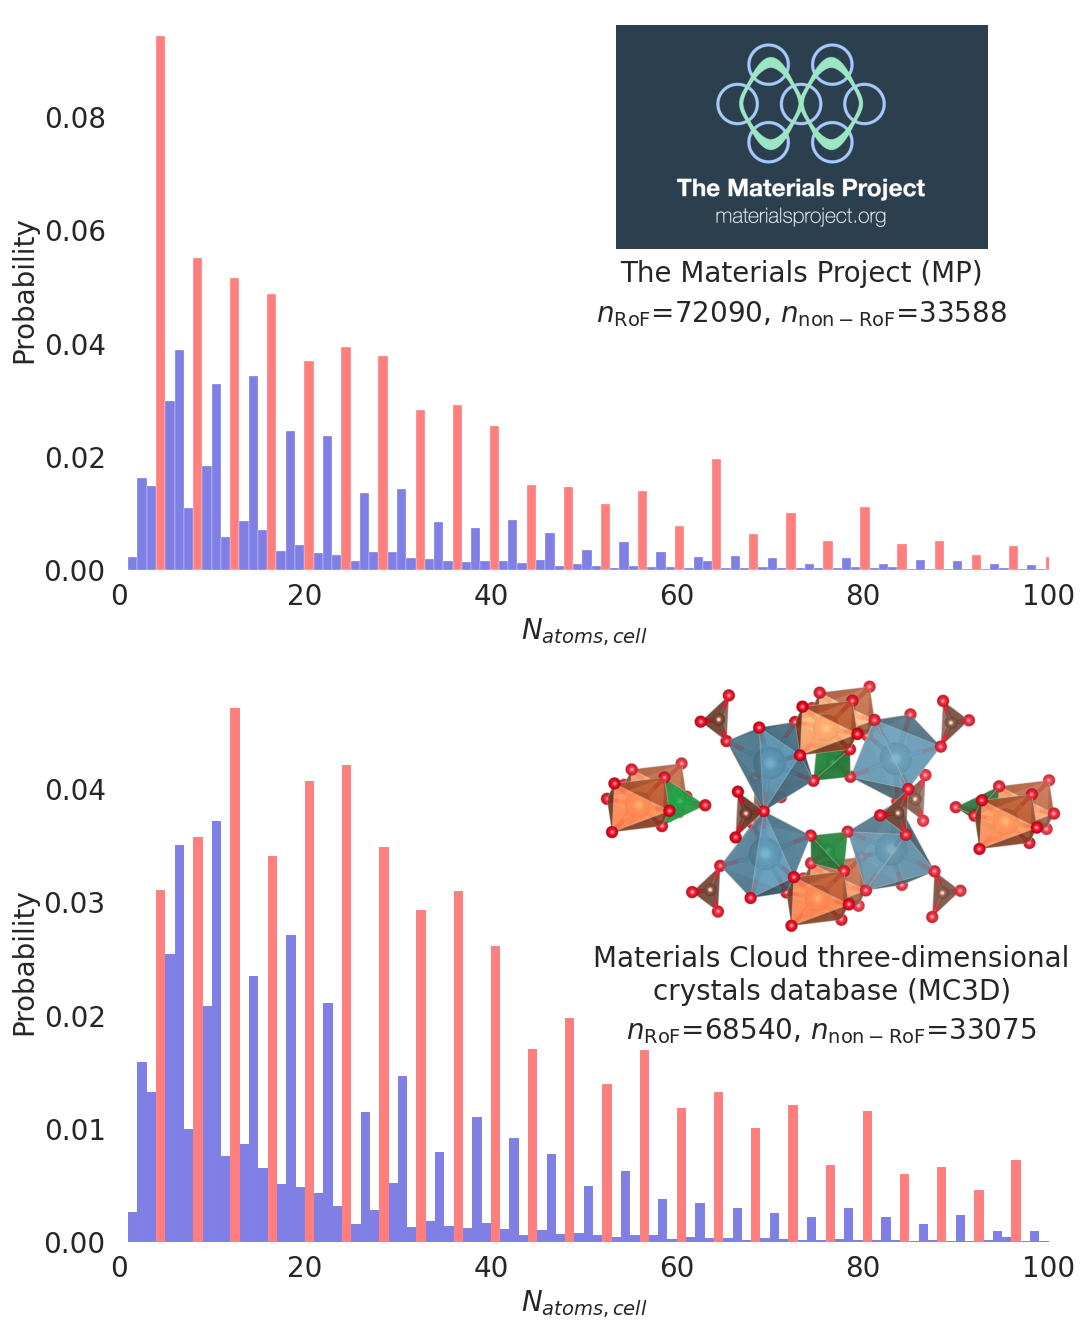

In [13]:
sns.set(style="white", palette="bright", color_codes=True)
my_c = colors.ListedColormap(["mediumblue", "red"])
c = ["mediumblue", "red"]
sns.set_palette(sns.color_palette(c))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
sns.histplot(ax=ax1, data=df_mp, x='natoms', hue='magic', stat='probability', bins=int(natoms_mp.max()), legend=False)
sns.histplot(ax=ax2, data=df_exp, x='natoms', hue='magic', stat='probability', bins=int(natoms_exp.max()), legend=False)

mat_inset = inset_axes(ax1, width="50%", height="40%", borderpad=1, loc="upper right")
mat_inset.imshow(mat_project_logo)
mat_inset.axis("off")
mat_inset.text(
    x=0.5,
    y=-0.05,
    ha="center",
    va="top",
    s="The Materials Project (MP)",
    fontsize=20,
    transform=mat_inset.transAxes,
)
mat_inset.text(
    x=0.5,
    y=-0.225,
    ha="center",
    va="top",
    s="$n_{{\\rm{{RoF}}}}$={}, $n_{{\\rm{{non-RoF}}}}$={}".format(
        n_magic_mp, n_nonmagic_mp
    ),
    fontsize=20,
    transform=mat_inset.transAxes,
)

m3dcd_inset = inset_axes(ax2, width="50%", height="50%", borderpad=-1, loc="upper right")
m3dcd_inset.imshow(m3dcd_logo)
m3dcd_inset.axis("off")
m3dcd_inset.text(
    x=0.5,
    y=-0.03, #0.05 is too low in fig 
    ha="center",
    va="top",
    s="Materials Cloud three-dimensional\ncrystals database (MC3D)",
    fontsize=20,
    transform=m3dcd_inset.transAxes,
)
m3dcd_inset.text(
    x=0.5,
    y=-0.3, # 0.225
    ha="center",
    va="top",
    s="$n_{{\\rm{{RoF}}}}$={}, $n_{{\\rm{{non-RoF}}}}$={}".format(
        n_magic_3dcd, n_nonmagic_3dcd
    ),
    fontsize=20,
    transform=m3dcd_inset.transAxes,
)
sns.despine(left=True, bottom=True)

ax1.set_xlim(0, 100)
ax1.set_xlabel(r"$N_{atoms, cell}$", fontsize=20)
ax1.set_ylabel("Probability", fontsize=20)
ax1.tick_params(labelsize=20)

ax2.set_xlim(0, 100)
ax2.set_xlabel(r"$N_{atoms, cell}$", fontsize=20)
ax2.set_ylabel("Probability", fontsize=20)
ax2.tick_params(labelsize=20)

plt.savefig("../../natoms.png", dpi=300, bbox_inches='tight')



## testing for Si

In [16]:
def get_num_species(frame):
    elements = frame.get_chemical_symbols()
    return elements

desired_el='Si'
 
desired_frames_mp=[]
len_desired_frames_mp=[]

desired_frames_exp=[]
len_desired_frames_exp=[]

for i, frame in enumerate(tqdm(mp_frames)):
    # frame.wrap(eps=1e-10)
    if desired_el in get_num_species(frame):
        desired_frames_mp.append(frame)
        len_desired_frames_mp.append(len(frame))

for i, frame in enumerate(tqdm(exp_frames)):
    # frame.wrap(eps=1e-10)
    if desired_el in get_num_species(frame):
        desired_frames_exp.append(frame)
        len_desired_frames_exp.append(len(frame))

100%|██████████| 79854/79854 [00:01<00:00, 72998.12it/s]


In [17]:
n_magic_mp_si = len(np.where(np.array(len_desired_frames_mp) % 4 == 0)[0])
n_magic_exp_si = len(np.where(np.array(len_desired_frames_exp) % 4 == 0)[0])
print('number of MP frames that contain Si', len(len_desired_frames_mp), 'of which ', n_magic_mp_si, 'contain a mulitple of 4 atoms')
print('number of MC3D frames that contain Si', len(len_desired_frames_exp), 'of which ', n_magic_exp_si, 'contain a mulitple of 4 atoms')


number of MP frames that contain Si 6083 of which  3593 contain a mulitple of 4 atoms
number of MC3D frames that contain Si 6001 of which  3441 contain a mulitple of 4 atoms


In [18]:
magic_mp_si = len(np.where(np.array(len_desired_frames_mp) % 4 == 0)[0])
magic_exp_si = len(np.where(np.array(len_desired_frames_exp) % 4 == 0)[0])

/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/elena/anaconda3/envs/r4/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


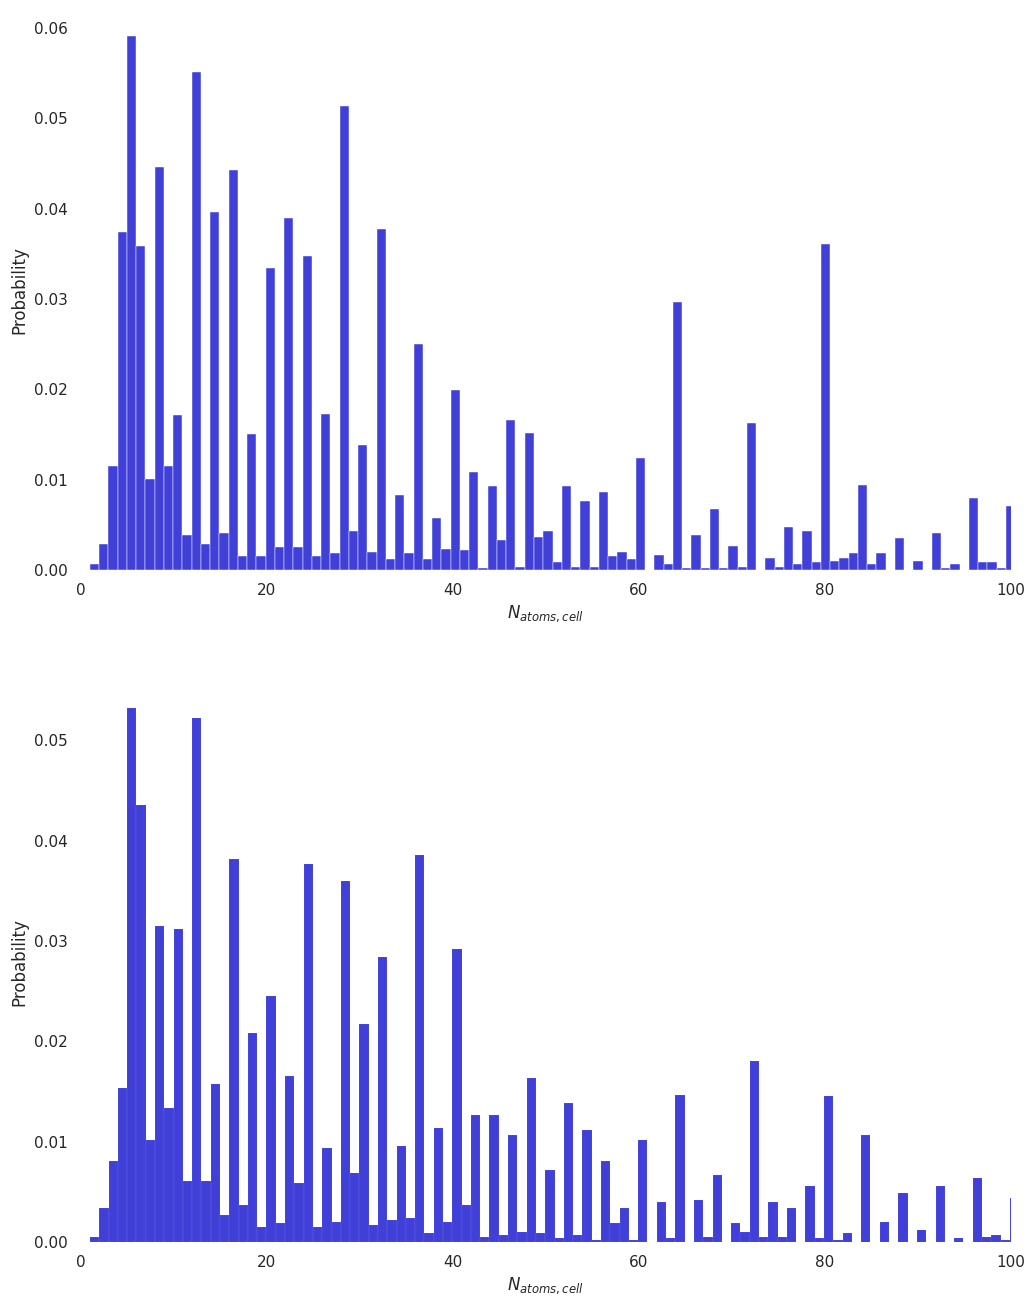

In [19]:
sns.set(style="white", palette="bright", color_codes=True)
my_c = colors.ListedColormap(["mediumblue", "red"])
c = ["mediumblue", "red"]
sns.set_palette(sns.color_palette(c))

# sns.histplot(data=len_desired_frames_mp,  stat='probability', bins=int(np.array(len_desired_frames_mp).max()))
# plt.show()
# sns.histplot(data=len_desired_frames_exp, stat='probability', bins=int(np.array(len_desired_frames_exp).max()))
# plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
sns.histplot(ax=ax1, data=len_desired_frames_mp,  stat='probability', bins=int(np.array(len_desired_frames_mp).max()))
sns.histplot(ax=ax2, data=len_desired_frames_exp, stat='probability', bins=int(np.array(len_desired_frames_exp).max()))

sns.despine(left=True, bottom=True)
ax1.set_xlim(0, 100)
ax1.set_xlabel(r"$N_{atoms, cell}$")
ax2.set_xlim(0, 100)
ax2.set_xlabel(r"$N_{atoms, cell}$")


plt.savefig("../../Si.png", dpi=300)

In [14]:
ns = range(3, 20)
n_magic_all_mp = np.zeros(len(ns))
n_magic_all_3dcd = np.zeros(len(ns))
n_nmagic_all_mp = np.zeros(len(ns))
n_nmagic_all_3dcd = np.zeros(len(ns))
for i, v in enumerate(tqdm(ns)):
    n_magic_all_mp[i] = len(np.where(natoms_mp % v == 0)[0])
    n_magic_all_3dcd[i] = len(np.where(natoms_exp % v == 0)[0])
    n_nmagic_all_mp[i] = len(np.where(natoms_mp % v != 0)[0])
    n_nmagic_all_3dcd[i] = len(np.where(natoms_exp % v != 0)[0])

100%|██████████| 17/17 [00:00<00:00, 166.00it/s]


In [20]:
from spglib import find_primitive

In [21]:
tols = np.array(list(sorted([*np.logspace(-8, 0, 9), 0.2, 0.5, 0.8])))
save_period = 1000
tols

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       2.e-01, 5.e-01, 8.e-01, 1.e+00])

In [22]:
if os.path.exists("mp_symms.npy"):
    mp_symm = np.array(np.load("mp_symms.npy"), dtype=float)
    mp_symm[mp_symm < 0] = np.nan
else:
    mp_symm = np.zeros((len(tols), len(mp_frames)), dtype=float)

for next_tol in np.where(np.nanmin(mp_symm, axis=1) == 0)[0]:
    if mp_symm[next_tol][0] != 0.0:
        print(len(np.where(mp_symm[next_tol] == 0)[0]))
        i = np.where(mp_symm[next_tol] == 0)[0][0]
        mp_symm[next_tol][i] = np.nan
        np.save("mp_symms.npy", mp_symm)
        save_period = 1
    print(tols, tols[next_tol], save_period)

    for i, cell in enumerate(tqdm(mp_frames)):
        if mp_symm[next_tol][i] == 0:
            prim = find_primitive(
                (
                    cell.get_cell(),
                    cell.get_scaled_positions(),
                    cell.get_atomic_numbers(),
                ),
                symprec=tols[next_tol],
            )
            mp_symm[next_tol][i] = len(prim[2]) if prim is not None else np.nan
            if i % save_period == 0:
                np.save("mp_symms.npy", mp_symm)
            if save_period == 1 and i % 1000 == 0:
                save_period = 1000

In [23]:
if os.path.exists("exp_symms.npy"):
    exp_symm = np.array(np.load("exp_symms.npy"), dtype=float)
    exp_symm[exp_symm < 0] = np.nan
else:
    exp_symm = np.zeros((len(tols), len(exp_frames)), dtype=float)

for next_tol in np.where(np.nanmin(exp_symm, axis=1) == 0)[0]:
    if exp_symm[next_tol][0] != 0.0:
        print(len(np.where(exp_symm[next_tol] == 0)[0]))
        i = np.where(exp_symm[next_tol] == 0)[0][0]
        exp_symm[next_tol][i] = np.nan
        np.save("exp_symms.npy", exp_symm)
        save_period = 1
    print(tols, tols[next_tol])

    for i, cell in enumerate(tqdm(exp_frames)):
        if exp_symm[next_tol][i] == 0:
            prim = find_primitive(
                (
                    cell.get_cell(),
                    cell.get_scaled_positions(),
                    cell.get_atomic_numbers(),
                ),
                symprec=tols[next_tol],
            )
            exp_symm[next_tol][i] = len(prim[2]) if prim is not None else np.nan
            if i % save_period == 0:
                np.save("exp_symms.npy", exp_symm)
            if save_period == 1 and i % 1000 == 0:
                save_period = 1000

In [24]:
perc_flip_mp = [
    1 - len(np.where(mp_symm[i] % 4 == 0)[0]) / len(np.where(natoms_mp % 4 == 0)[0])
    if min(mp_symm[i]) > 0
    else np.nan
    for i in range(len(tols))
]
perc_flip_exp = [
    1 - len(np.where(exp_symm[i] % 4 == 0)[0]) / len(np.where(natoms_exp % 4 == 0)[0])
    if min(exp_symm[i]) > 0
    else np.nan
    for i in range(len(tols))
]

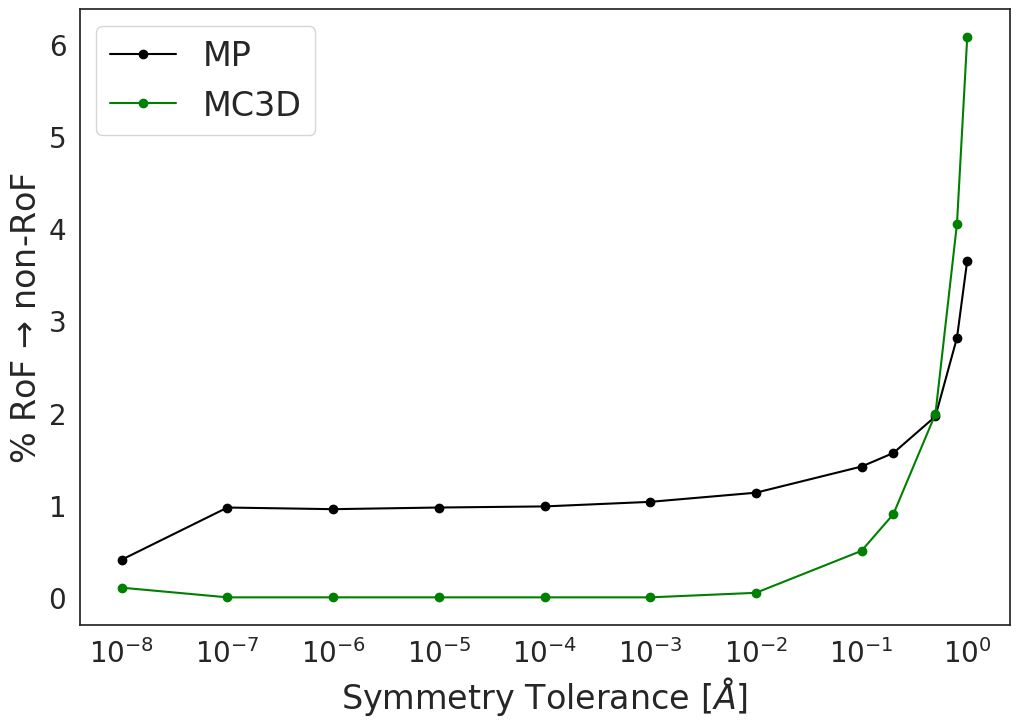

In [26]:
fig, ax_symm = plt.subplots(
    1,
    1,
    figsize=(12, 8),
    sharey=True,
)

mp_color = "black"
exp_color = "green"

ax_symm.semilogx(
    tols,
    [i * 100 for i in perc_flip_mp],
    marker="o",
    label="MP",
    color=mp_color,
)

ax_symm.semilogx(
    tols,
    [i * 100 for i in perc_flip_exp],
    marker="o",
    label="MC3D",
    color=exp_color,
)


ax_symm.legend(fontsize=24)
ax_symm.set_xlabel(r"Symmetry Tolerance [$\AA$]", fontsize=24)
ax_symm.set_ylabel(r"% RoF $\to$ non-RoF", fontsize=24)
ax_symm.set_xticks(tols)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig("../../perc_flip_symm_flip.png", bbox_inches="tight", dpi=300)
plt.show()